# Hero FinCorp: A Comprehensive Data-Driven Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [5]:
# Load dataset using Latin-1 encoding
app_df = pd.read_csv('applications.csv', encoding='latin1',low_memory=False,)
trans_df = pd.read_csv('transactions.csv', encoding='latin1')
loan_df = pd.read_csv('loans.csv', low_memory=False, encoding='latin1')
branch_df = pd.read_csv('branches.csv', encoding='latin1')
customer_df = pd.read_csv('customers.csv', encoding='latin1')
default_df = pd.read_csv('defaults.csv', encoding='latin1')

In [7]:
app_df.info(), trans_df.info(),loan_df.info(), branch_df.info(), customer_df.info(), default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495000 entries, 0 to 494999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Transaction_ID     495000 non-null  object
 1   Loan_ID            495000 non-

(None, None, None, None, None, None)

# 1. Data Quality and Preparation

In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB


In [6]:
# Most frequent approval date
#app_df.loc[:, 'Approval_Date'] = app_df['Approval_Date'].fillna(most_common_date)
mask = app_df['Approval_Date'] < app_df['Application_Date']
app_df.loc[mask, 'Approval_Date'] = app_df.loc[mask, 'Application_Date']


In [7]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB


In [8]:
# Check Missing values, Remove unwanted columns from the Applications_Dataframe

# Remove completely blank row
app_df.dropna(how='all', inplace=True)

# To fill blank rows appearing in approval date column
mask = app_df['Approval_Date'] < app_df['Application_Date']
app_df.loc[mask, 'Approval_Date'] = app_df.loc[mask, 'Application_Date']

# Fill missing values for non-critical columns with placeholder
app_df['Loan_ID'] = app_df['Loan_ID'].fillna('Unknown ID')

# Check if there's any remaining missing data
missing_summary_in_app_df = app_df.isnull().sum()

# Save cleaned data to a new CSV
app_df.to_csv("applications_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_app_df)

Cleaning complete. Missing data summary:
Application_ID          0
Loan_ID                 0
Customer_ID             0
Application_Date        0
Approval_Date       12600
Loan_Purpose            0
Source_Channel          0
Processing_Fee          0
Approval_Status         0
Rejection_Reason    70000
dtype: int64


In [9]:
# Check Missing values, Remove unwanted columns from the transactions_Dataframe

# Remove completely blank row
trans_df.dropna(how='all', inplace=True)

# Check if there's any remaining missing data
missing_summary_in_trans_df = trans_df.isnull().sum()

# Save cleaned data to a new CSV
trans_df.to_csv("transactions_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_trans_df)

Cleaning complete. Missing data summary:
Transaction_ID       0
Loan_ID              0
Customer_ID          0
Transaction_Date     0
Payment_Type         0
Amount               0
Overdue_Fee          0
Remaining_Balance    0
Mode_of_Payment      0
dtype: int64


In [10]:
# Check Missing values, Remove unwanted columns from the loans_Dataframe

# Remove completely blank row
loan_df.dropna(how='all', inplace=True)

# Fill missing values for non-critical columns with placeholder
loan_df['Collateral_Details'] = loan_df['Collateral_Details'].fillna('None')

# Check if there's any remaining missing data
missing_summary_in_loan_df = loan_df.isnull().sum()

# Save cleaned data to a new CSV
loan_df.to_csv("loans_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_loan_df)

Cleaning complete. Missing data summary:
Loan_ID                 0
Customer_ID             0
Loan_Amount             0
Interest_Rate           0
Loan_Term               0
Application_Date        0
Disbursal_Date          0
Repayment_Start_Date    0
Repayment_End_Date      0
Loan_Status             0
Overdue_Amount          0
EMI_Amount              0
Collateral_Details      0
dtype: int64


In [11]:
# Check Missing values, Remove unwanted columns from the branches_Dataframe

# Remove completely blank row
branch_df.dropna(how='all', inplace=True)

# Check if there's any remaining missing data
missing_summary_in_branch_df = branch_df.isnull().sum()

# Save cleaned data to a new CSV
branch_df.to_csv("branch_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_branch_df)

Cleaning complete. Missing data summary:
Branch_ID                     0
Branch_Name                   0
Region                        0
Total_Customers               0
Total_Active_Loans            0
Delinquent_Loans              0
Loan_Disbursement_Amount      0
Avg_Processing_Time           0
Relationship_Manager_Count    0
dtype: int64


In [12]:
# Check Missing values, Remove unwanted columns from the customers_Dataframe

# Remove completely blank row
customer_df.dropna(how='all', inplace=True)

# Check if there's any remaining missing data
missing_summary_in_customer_df = customer_df.isnull().sum()

# Save cleaned data to a new CSV
customer_df.to_csv("customer_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_customer_df)

Cleaning complete. Missing data summary:
Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status             0
Employment_Status          0
Annual_Income              0
Credit_Score               0
Region                     0
Account_Tenure             0
Relationship_Manager_ID    0
dtype: int64


In [13]:
# Check Missing values, Remove unwanted columns from the defaults_Dataframe

# Remove completely blank row
default_df.dropna(how='all', inplace=True)

# Fill missing values for non-critical columns with placeholder
default_df['Recovery_Status'] = default_df['Recovery_Status'].fillna('None')

# Check if there's any remaining missing data
missing_summary_in_default_df = default_df.isnull().sum()

# Save cleaned data to a new CSV
default_df.to_csv("defaults_cleaned.csv", index=False)

print("Cleaning complete. Missing data summary:")
print(missing_summary_in_default_df)

Cleaning complete. Missing data summary:
Default_ID         0
Loan_ID            0
Customer_ID        0
Default_Date       0
Default_Amount     0
Default_Reason     0
Recovery_Status    0
Recovery_Amount    0
Legal_Action       0
dtype: int64


In [14]:
# Convert all the date columns in Each table from Object to Datetime type

# Applications dataframe
#applications_df['Application_date'] = pd.to_datetime(applications_df['Application_date'], errors='coerce')
app_df['Application_Date'] = pd.to_datetime(app_df['Application_Date'],errors='coerce')
app_df['Approval_Date'] = pd.to_datetime(app_df['Approval_Date'],errors='coerce')

# Defaults dataframe
default_df['Default_Date'] = pd.to_datetime(default_df['Default_Date'],errors='coerce')

# Loans dataframe
loan_df['Disbursal_Date'] = pd.to_datetime(loan_df['Disbursal_Date'], errors='coerce', dayfirst=True)
loan_df['Repayment_Start_Date'] = pd.to_datetime(loan_df['Repayment_Start_Date'], errors='coerce', dayfirst=True)
loan_df['Repayment_End_Date'] = pd.to_datetime(loan_df['Repayment_End_Date'], errors='coerce', dayfirst=True)

# Transactions Dataframe
trans_df['Transaction_Date'] = pd.to_datetime(trans_df['Transaction_Date'], errors='coerce', dayfirst=True)

In [15]:
# Get info of the all the CSV files
def print_dataframe_info(**dataframes):
    for name, df in dataframes.items():
        print(f"Info for '{name}':")
        print("-" * 50)
        print(df.info())
        print("_" * 50 + "\n")

print_dataframe_info(app_df=app_df,
                      branch_df=branch_df,
                      customer_df=customer_df,
                      default_df=default_df,
                      loan_df=loan_df,
                      trans_df=trans_df)

Info for 'app_df':
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Application_ID    82600 non-null  object        
 1   Loan_ID           82600 non-null  object        
 2   Customer_ID       82600 non-null  object        
 3   Application_Date  32629 non-null  datetime64[ns]
 4   Approval_Date     10972 non-null  datetime64[ns]
 5   Loan_Purpose      82600 non-null  object        
 6   Source_Channel    82600 non-null  object        
 7   Processing_Fee    82600 non-null  int64         
 8   Approval_Status   82600 non-null  object        
 9   Rejection_Reason  12600 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 6.3+ MB
None
__________________________________________________

Info for 'branch_df':
-------------------------

# Handle outliers in numeric columns like Loan_Amount, Interest_Rate, and Default_Amount.



In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
# Load all the cleaned Data
app1_df = pd.read_csv('applications_cleaned.csv',low_memory=False)
trans1_df = pd.read_csv('transactions_cleaned.csv', encoding='latin1')
loan1_df = pd.read_csv('loans_cleaned.csv', low_memory=False, encoding='latin1')
branch1_df = pd.read_csv('branch_cleaned.csv', encoding='latin1')
customer1_df = pd.read_csv('customer_cleaned.csv', encoding='latin1')
default1_df = pd.read_csv('defaults_cleaned.csv', encoding='latin1')

In [37]:
app1_df, trans1_df, loan1_df, branch1_df, customer1_df, default1_df

(      Application_ID     Loan_ID Customer_ID Application_Date Approval_Date  \
 0            A000001     L000001     C000001       02-10-2020    11-05-2022   
 1            A000002     L000002     C000002       18-03-2022    29-11-2022   
 2            A000003     L000003     C000003       17-01-2022    17-01-2022   
 3            A000004     L000004     C000004       09-03-2019    30-08-2024   
 4            A000005     L000005     C000005       18-03-2020    18-07-2024   
 ...              ...         ...         ...              ...           ...   
 82595        A082596  Unknown ID     C016646       19-08-2021    19-08-2021   
 82596        A082597  Unknown ID     C010571       30-01-2021    30-01-2021   
 82597        A082598  Unknown ID     C006731       17-04-2023    17-04-2023   
 82598        A082599  Unknown ID     C008140       22-04-2021    22-04-2021   
 82599        A082600  Unknown ID     C060782       28-05-2023    28-05-2023   
 
           Loan_Purpose Source_Channel

Index(['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term',
       'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date',
       'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details'],
      dtype='object')


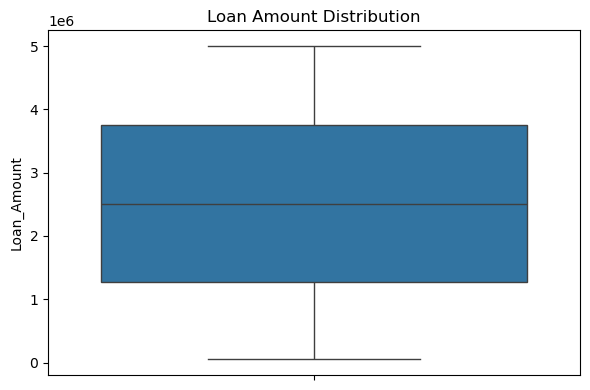

In [18]:
# Check outliers in Loans Dataframe Loan_Amount column
# Loan Amount Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Confirm column names
print(loan1_df.columns)

# Plotting boxplot
plt.figure(figsize=(6,4))
sns.boxplot(y=loan1_df['Loan_Amount'])  # use direct column access for safety
plt.title('Loan Amount Distribution')
plt.tight_layout()
plt.show()

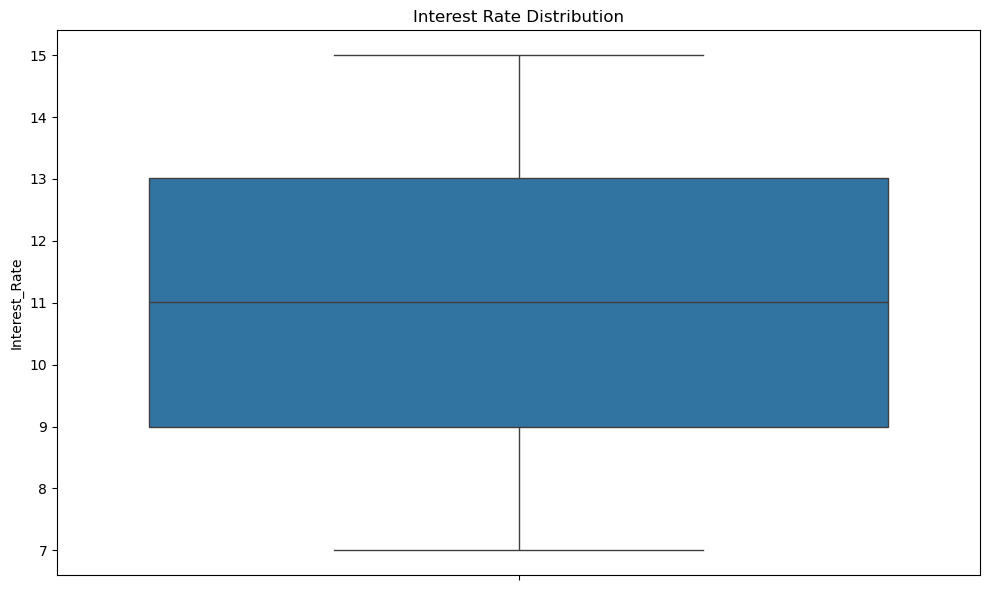

In [19]:
# Interest Rate Distribution
plt.figure(figsize=(10,6))
sns.boxplot(y='Interest_Rate',data=loan1_df)
plt.title('Interest Rate Distribution')
plt.tight_layout() # Adjust the data in the Chart
plt.show()

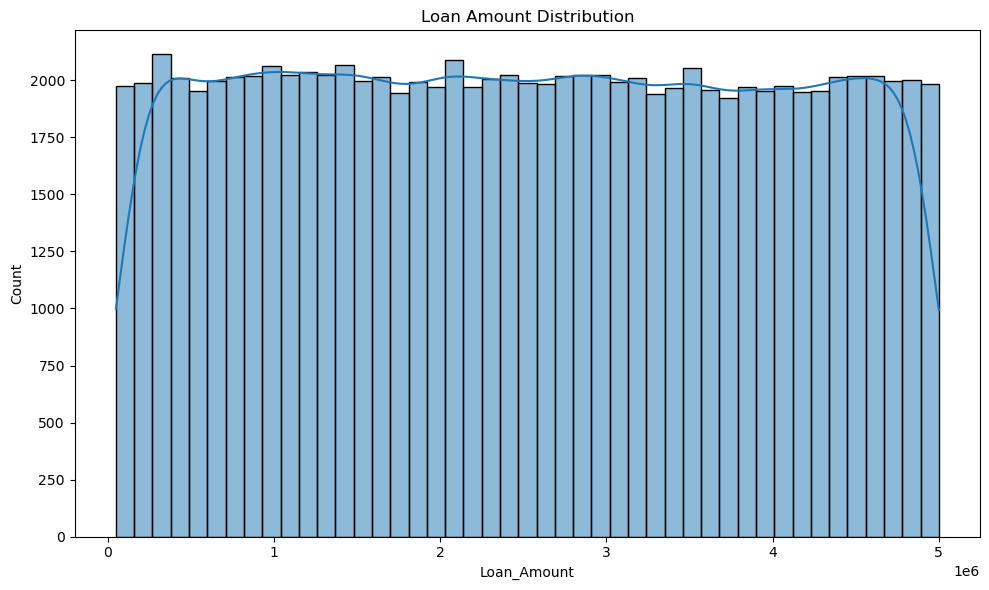

In [20]:
# For cross verification purpose
# Loan Amount Distribution
plt.figure(figsize=(10,6))
sns.histplot(x='Loan_Amount', data=loan1_df, kde=True)
plt.title("Loan Amount Distribution")
plt.tight_layout()
plt.show()

## 2. Descriptive Analysis

In [32]:
app1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\applications.csv', encoding='latin1',low_memory=False,)
trans1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\transactions.csv', encoding='latin1')
loan1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\loans.csv', low_memory=False, encoding='latin1')
branch1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\branches.csv', encoding='latin1')
customer1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\customers.csv', encoding='latin1')
default1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\defaults.csv', encoding='latin1')

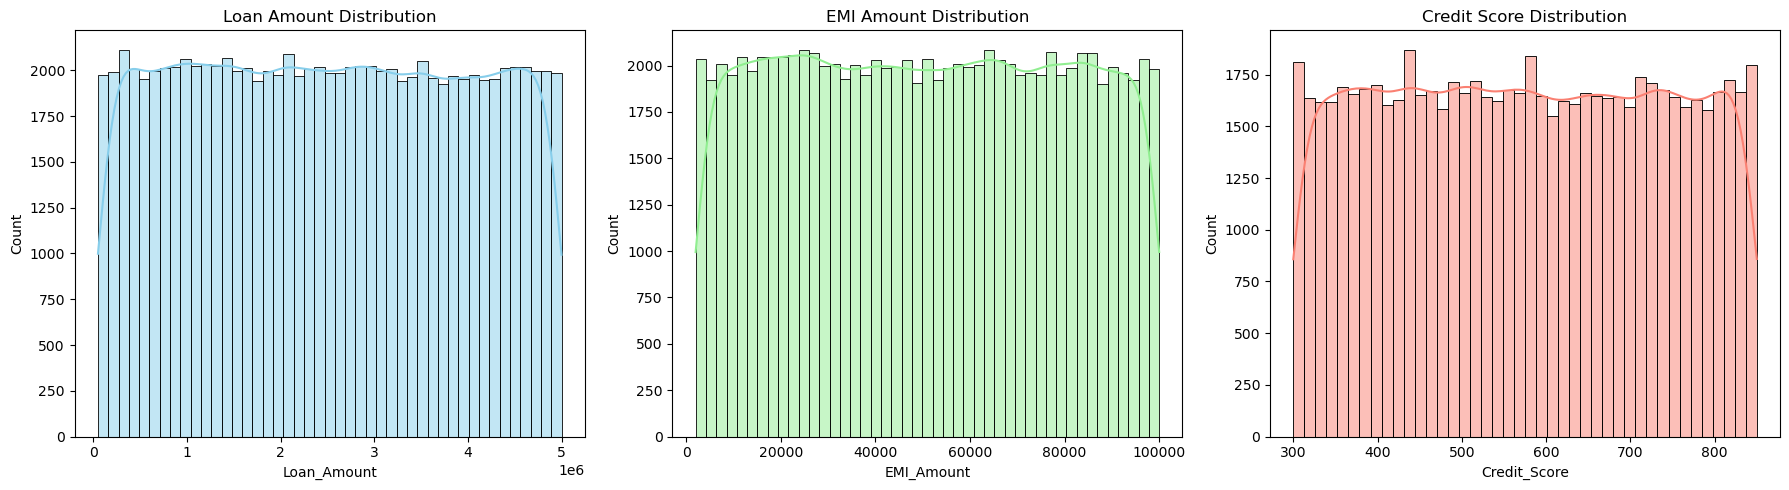

In [23]:
# Distribution of Loan_Amount, EMI_Amount, and Credit_Score.
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(loan_df['Loan_Amount'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Loan Amount Distribution')

sns.histplot(loan_df['EMI_Amount'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('EMI Amount Distribution')

sns.histplot(customer_df['Credit_Score'], kde=True, ax=axs[2], color='salmon')
axs[2].set_title('Credit Score Distribution')

plt.tight_layout()
plt.show()

Total loan records: 8
Total loan amount disbursed: ₹460000


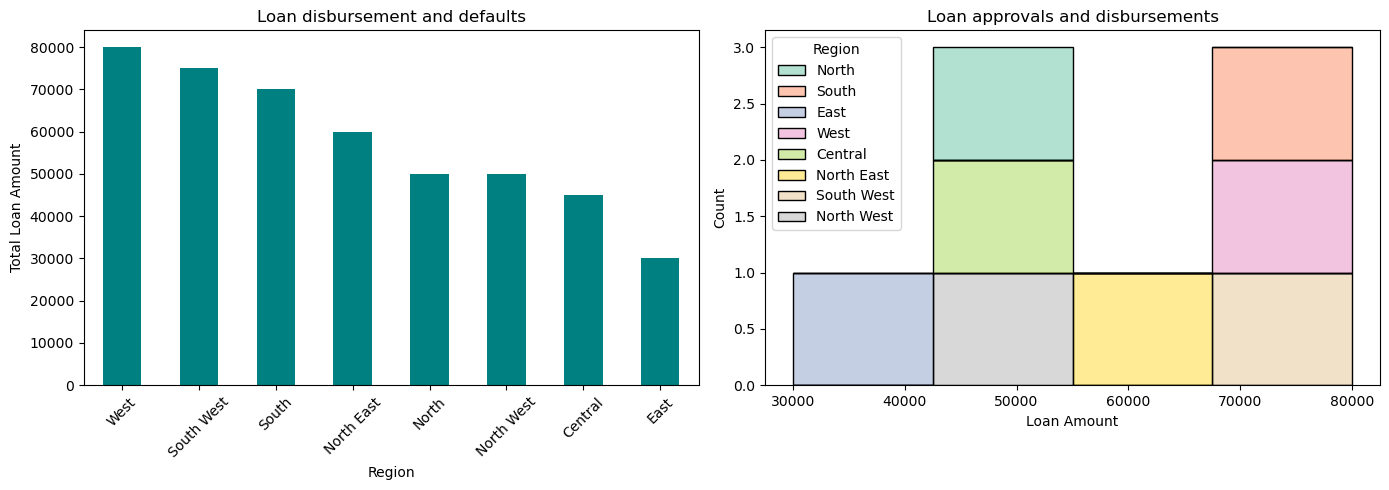

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data

customer1_df = pd.DataFrame({
    'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Region': ['North', 'South', 'East', 'West', 'Central', 'North East', 'South West', 'North West']
})

loan1_df = pd.DataFrame({
    'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Loan_Amount': [50000, 70000, 30000, 80000, 45000, 60000, 75000, 50000]
})

# Merge DataFrames
merged_df = pd.merge(customer1_df, loan1_df, on='Customer_ID', how='inner')

# Summary info
print(f"Total loan records: {merged_df.shape[0]}")
print(f"Total loan amount disbursed: ₹{merged_df['Loan_Amount'].sum()}")

# Prepare data
region_loan = merged_df.groupby('Region')['Loan_Amount'].sum().sort_values(ascending=False)

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart - loan disbursement by region
region_loan.plot(kind='bar', ax=axs[0], color='teal')
axs[0].set_title('Loan disbursement and defaults')
axs[0].set_ylabel('Total Loan Amount')
axs[0].set_xlabel('Region')
axs[0].tick_params(axis='x', rotation=45)

# Histogram - loan aapprovals and distribution
sns.histplot(data=merged_df, x='Loan_Amount', hue='Region', multiple='stack',
             kde=True, palette='Set2', ax=axs[1])
axs[1].set_title('Loan approvals and disbursements')
axs[1].set_xlabel('Loan Amount')

plt.tight_layout()
plt.show()

In [66]:
# Monthly trends in loan approvals and disbursements.
# Load CSV
loan1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\loans.csv', low_memory=False, encoding='latin1')
print("Loans data loaded:", loan1_df.shape)

# Check columns after parsing dates
print("Loan columns:", loan1_df.columns.tolist())

# Application dates
app1_df['Application_Date'] = pd.to_datetime(app1_df['Application_Date'], errors='coerce')
app1_df['Approval_Date'] = pd.to_datetime(app1_df['Approval_Date'], errors='coerce')
print("Application dates parsed:", app1_df[['Application_Date', 'Approval_Date']].head())

# Default dates
default1_df['Default_Date'] = pd.to_datetime(default1_df['Default_Date'], errors='coerce')
print("Default dates parsed:", default1_df['Default_Date'].head())

# Disbursal and repayment dates
loan1_df['Disbursal_Month'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce', dayfirst=True)
loan1_df['Repayment_Start_Date'] = pd.to_datetime(loan1_df['Repayment_Start_Date'], errors='coerce', dayfirst=True)
loan1_df['Repayment_End_Date'] = pd.to_datetime(loan1_df['Repayment_End_Date'], errors='coerce', dayfirst=True)
print("Date columns in loan1_df:\n", loan1_df[['Disbursal_Date', 'Disbursal_Month', 'Repayment_Start_Date', 'Repayment_End_Date']].head())

# Transaction dates
trans1_df['Transaction_Date'] = pd.to_datetime(trans1_df['Transaction_Date'], errors='coerce', dayfirst=True)
print("Transaction date sample:\n", trans1_df['Transaction_Date'].head())


Loans data loaded: (90000, 13)
Loan columns: ['Loan_ID', 'Customer_ID', 'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Application_Date', 'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date', 'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details']
Application dates parsed:   Application_Date Approval_Date
0       2020-02-10    2022-11-05
1              NaT           NaT
2              NaT    2023-01-07
3       2019-09-03           NaT
4              NaT           NaT
Default dates parsed: 0   2022-07-20
1   2023-09-23
2   2024-08-04
3   2021-10-16
4   2024-10-07
Name: Default_Date, dtype: datetime64[ns]
Date columns in loan1_df:
   Disbursal_Date Disbursal_Month Repayment_Start_Date Repayment_End_Date
0     25-03-2023      2023-03-25           2023-04-25         2025-03-25
1     23-10-2023      2023-10-23           2023-11-23         2027-10-23
2     30-07-2024      2024-07-30           2024-08-30         2026-07-30
3     22-11-2024      2024-11-22           2024-

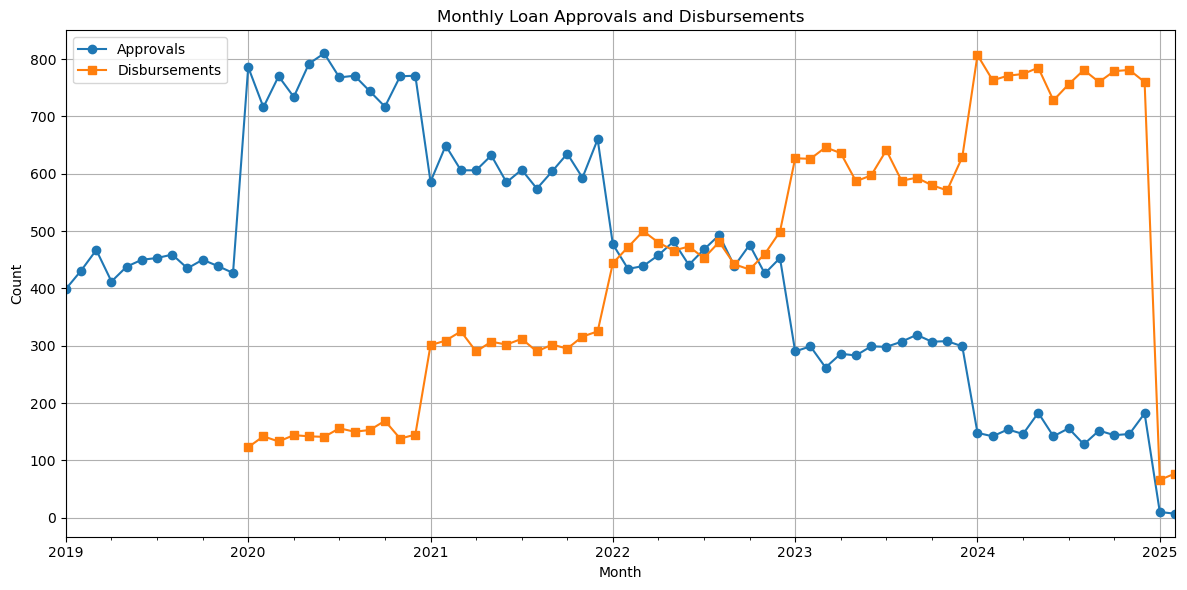

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime safely
app1_df['Application_Date'] = pd.to_datetime(app1_df['Application_Date'], errors='coerce')
app1_df['Approval_Date'] = pd.to_datetime(app1_df['Approval_Date'], errors='coerce')

# Create new columns for monthly periods (preserve original dates)
app1_df['Application_Month'] = app1_df['Application_Date'].dt.to_period('M')
app1_df['Approval_Month'] = app1_df['Approval_Date'].dt.to_period('M')

# Group by month
approvals = app1_df.groupby('Application_Month').size()
disbursements = app1_df.groupby('Approval_Month').size()

# Check for empty results before plotting
if approvals.empty or disbursements.empty:
    print("Warning: One of the series is empty. Cannot generate plot.")
    print("\nValid Application Dates:", app1_df['Application_Date'].notna().sum())
    print("Valid Approval Dates:", app1_df['Approval_Date'].notna().sum())
    print("\nApplication_Month value counts:\n", app1_df['Application_Month'].value_counts())
    print("Approval_Month value counts:\n", app1_df['Approval_Month'].value_counts())
else:
    plt.figure(figsize=(12, 6))
    approvals.plot(label='Approvals', marker='o')
    disbursements.plot(label='Disbursements', marker='s')
    plt.title('Monthly Loan Approvals and Disbursements')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Default Risk Analysis

In [68]:
# Correlation Between Loan Attributes and Defaults:
# Calculate correlations between Loan_Amount, Interest_Rate, Credit_Score, and Default_Flag (a binary indicator for default).
# Sample: Load your dataset - Contains Loan_Amount, Interest_Rate, etc.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
loan1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\loans.csv', low_memory=False, encoding='latin1')
#branch1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\branches.csv', encoding='latin1')
customer1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\customers.csv', encoding='latin1')
default1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\defaults.csv', encoding='latin1')

customer1_df['Credit_Score'] = pd.to_numeric(customer1_df['Credit_Score'], errors='coerce')

loan1_defaults = loan1_df.merge(default1_df[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
loan1_defaults['Default_Flag'] = np.where(loan1_defaults['Default_Amount'].isnull(), 0, 1)
loan1_defaults = loan1_defaults.merge(customer1_df[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')
# Compute correlation matrix
correlation_data = loan1_defaults[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']]
correlation_matrix = correlation_data.corr()
correlation_matrix

,Loan_Amount,Interest_Rate,Credit_Score,Default_Flag
Loan_Amount,1.000000,-0.003451,0.000262,-0.002401
Interest_Rate,-0.003451,1.000000,0.002498,-0.004763
Credit_Score,0.000262,0.002498,1.000000,-0.001724
Default_Flag,-0.002401,-0.004763,-0.001724,1.000000


In [ ]:
# Pairwise Correlation Analysis:
# Create a heatmap to visualize the correlations between key variables, such as EMI_Amount, Overdue_Amount, and Default_Amount.

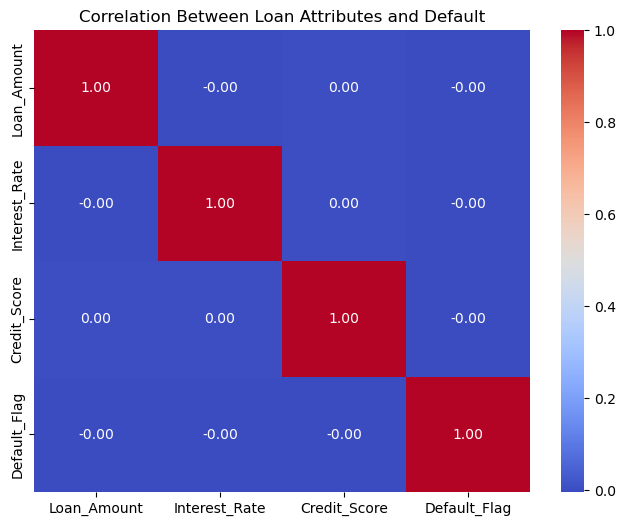

In [70]:
# visualize the correlations, using heatmap with seaborn:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Loan Attributes and Default")
plt.show()

In [72]:
# Correlation Between Branch Metrics and Defaults:
branch1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\branches.csv', encoding='latin1')
branch_defaults = branch1_df.merge(
    loan1_df[['Loan_ID', 'Customer_ID', 'Loan_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Customer_ID'
).merge(
    default1_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

branch_analysis = branch_defaults.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum'
}).reset_index()

branch_analysis['Default_Rate'] = (
    branch_analysis['Default_Amount'] / branch_analysis['Loan_Disbursement_Amount']
) * 100

branch_analysis.head()

,Branch_ID,Delinquent_Loans,Loan_Disbursement_Amount,Default_Amount,Default_Rate
0,B001,21,341680882,0.0,0.0
1,B002,149,96549019,0.0,0.0
2,B003,168,445787808,0.0,0.0
3,B004,96,353934299,0.0,0.0
4,B005,87,311637902,0.0,0.0


# 4. Branch and Regional Performance

In [74]:
branch_defaults = branch1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Loan_ID'
)

branch_metrics = branch_defaults.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

branch_metrics['Default_Rate'] = (branch_metrics['Default_Amount'] / branch_metrics['Loan_Disbursement_Amount']) * 100
branch_metrics['Recovery_Rate'] = (branch_metrics['Recovery_Amount'] / branch_metrics['Default_Amount']) * 100
branch_metrics_sorted = branch_metrics.sort_values(by='Default_Rate', ascending=False)
branch_metrics_sorted.head()

,Branch_ID,Delinquent_Loans,Loan_Disbursement_Amount,Default_Amount,Recovery_Amount,Default_Rate,Recovery_Rate
0,B001,21,341680882,0.0,0.0,0.0,NaN
37,B038,113,86826078,0.0,0.0,0.0,NaN
27,B028,70,393550434,0.0,0.0,0.0,NaN
28,B029,135,234351532,0.0,0.0,0.0,NaN
29,B030,18,15022525,0.0,0.0,0.0,NaN


In [76]:
# Branches ranking by processing time efficiency

branch_processing_efficiency = branch1_df[['Branch_ID', 'Branch_Name', 'Avg_Processing_Time']]
branch_processing_efficiency_ranked = branch_processing_efficiency.sort_values(by='Avg_Processing_Time').reset_index(drop=True)
branch_processing_efficiency_ranked.head()

,Branch_ID,Branch_Name,Avg_Processing_Time
0,B050,Sani-Kale,1
1,B047,Chawla-Tandon,2
2,B042,Kar-Jaggi,2
3,B018,"Sandhu, Magar and Sachdeva",2
4,B045,Solanki-Shah,3


In [78]:
# Compare branch performance across regions.
branch_performance = branch1_df.groupby('Region').agg({
    'Loan_Disbursement_Amount': 'sum',
    'Delinquent_Loans': 'sum',
    'Total_Active_Loans': 'sum'
}).reset_index()
branch_performance['Delinquency_Rate'] = (
    branch_performance['Delinquent_Loans'] / branch_performance['Total_Active_Loans']
) * 100
branch_performance_sorted = branch_performance.sort_values(by='Loan_Disbursement_Amount', ascending=False)
branch_performance_sorted

,Region,Loan_Disbursement_Amount,Delinquent_Loans,Total_Active_Loans,Delinquency_Rate
0,Central,3316048302,994,8715,11.405622
2,North,3296073904,1504,11965,12.569996
1,East,2006676282,756,8929,8.466794
5,West,1990828641,441,6861,6.427634
4,South,1694906506,846,9235,9.160801
3,Northeast,442827845,487,5174,9.412447


# 5 Customer Segmentation

In [80]:
# Segment customers by income, credit score, and loan status.
# Categorizing customers by income levels
customer1_df['Income_Segment'] = pd.cut(customer1_df['Annual_Income'],
    bins=[0, 500000, 1000000, 2000000, 5000000, float('inf')],
    labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])

# Categorizing customers by credit score levels
customer1_df['Credit_Score_Segment'] = pd.cut(customer1_df['Credit_Score'],
    bins=[0, 300, 500, 700, 850],
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

# Merging customers with loans to identify loan status
customer_segments = customer1_df.merge(loan1_df[['Customer_ID', 'Loan_Status']], on='Customer_ID', how='left')

# Aggregating segments to summarize
segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status'], observed=False).size().reset_index(name='Customer_Count' )
segmentation_summary

,Income_Segment,Credit_Score_Segment,Loan_Status,Customer_Count
0,Low,Poor,Active,8
1,Low,Poor,Closed,11
2,Low,Poor,Overdue,7
3,Low,Fair,Active,1852
4,Low,Fair,Closed,1841
5,Low,Fair,Overdue,1777
6,Low,Good,Active,1818
7,Low,Good,Closed,1801
8,Low,Good,Overdue,1839
9,Low,Excellent,Active,1378


In [82]:
# Identify high-risk and high-value customer groups.
customer_segments['Risk_Level'] = 'Low-Risk'
customer_segments.loc[
    (customer_segments['Credit_Score_Segment'].isin(['Poor', 'Fair'])) &
    (customer_segments['Loan_Status'].isin(['Active', 'Defaulted'])),
    'Risk_Level'
] = 'High-Risk'

customer_segments['Value_Level'] = 'Low-Value'
customer_segments.loc[
    (customer_segments['Credit_Score_Segment'] == 'Excellent') &
    (customer_segments['Loan_Status'] == 'Active'),
    'Value_Level'
] = 'High-Value'

risk_value_summary = customer_segments.groupby(['Risk_Level', 'Value_Level']).size().reset_index(name='Customer_Count')
risk_value_summary

,Risk_Level,Value_Level,Customer_Count
0,High-Risk,Low-Value,11064
1,Low-Risk,High-Value,8209
2,Low-Risk,Low-Value,90051


In [88]:
# Analyze repayment behavior across segments.
trans1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\transactions.csv', encoding='latin1')
repayment_behavior = trans1_df.merge(
    customer_segments[['Customer_ID', 'Income_Segment', 'Credit_Score_Segment', 'Risk_Level', 'Value_Level']],
    on='Customer_ID',
    how='left'
)
repayment_summary = repayment_behavior.groupby(
    ['Income_Segment', 'Credit_Score_Segment', 'Risk_Level', 'Value_Level', 'Payment_Type',], observed=False ).agg({
    'Amount': 'sum',
    'Overdue_Fee': 'sum',
    'Remaining_Balance': 'mean'
}).reset_index()
repayment_summary

,Income_Segment,Credit_Score_Segment,Risk_Level,Value_Level,Payment_Type,Amount,Overdue_Fee,Remaining_Balance
0,Low,Poor,High-Risk,High-Value,EMI,0,0,NaN
1,Low,Poor,High-Risk,High-Value,Penalty,0,0,NaN
2,Low,Poor,High-Risk,Low-Value,EMI,1966121,89392,1.145499e+06
3,Low,Poor,High-Risk,Low-Value,Penalty,1545704,62655,1.103916e+06
4,Low,Poor,Low-Risk,High-Value,EMI,0,0,NaN
...,...,...,...,...,...,...,...,...
155,High,Excellent,High-Risk,Low-Value,Penalty,0,0,NaN
156,High,Excellent,Low-Risk,High-Value,EMI,0,0,NaN
157,High,Excellent,Low-Risk,High-Value,Penalty,0,0,NaN
158,High,Excellent,Low-Risk,Low-Value,EMI,0,0,NaN


# 6 Advanced Statistical Analysis

In [90]:
# Correlation Analysis for Default Risks:
# Examine the correlation between Credit_Score, Loan_Amount, Interest_Rate, Overdue_Amount, and Default_Flag.
default_risk_data = loan1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
).merge(
    customer1_df[['Customer_ID', 'Credit_Score']],
    on='Customer_ID',
    how='left'
)
default_risk_data['Default_Flag'] = default_risk_data['Default_Amount'].notnull().astype(int)
key_variables = ['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Overdue_Amount', 'Default_Flag']
correlation_matrix_risk = default_risk_data[key_variables].corr()
correlation_matrix_risk

,Credit_Score,Loan_Amount,Interest_Rate,Overdue_Amount,Default_Flag
Credit_Score,1.000000,0.000262,0.002498,0.001990,-0.001724
Loan_Amount,0.000262,1.000000,-0.003451,0.008249,-0.002401
Interest_Rate,0.002498,-0.003451,1.000000,-0.002700,-0.004763
Overdue_Amount,0.001990,0.008249,-0.002700,1.000000,0.000020
Default_Flag,-0.001724,-0.002401,-0.004763,0.000020,1.000000


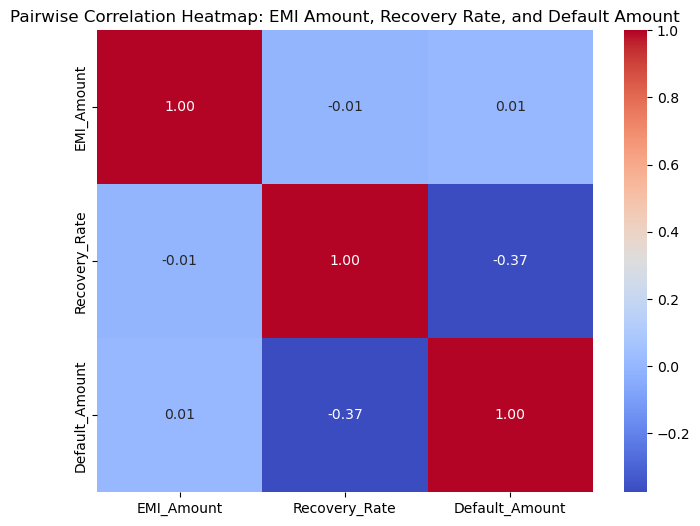

In [92]:
# Pairwise Correlation Heatmap:
# Generate a heatmap to visualize correlations among key variables like EMI_Amount, Recovery_Rate, and Default_Amount.
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = loan1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    on='Loan_ID',
    how='left'
)

heatmap_data['Recovery_Rate'] = (heatmap_data['Recovery_Amount'] / heatmap_data['Default_Amount']) * 100
heatmap_columns = ['EMI_Amount', 'Recovery_Rate', 'Default_Amount']
heatmap_data_filtered = heatmap_data[heatmap_columns].dropna()

correlation_heatmap = heatmap_data_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Heatmap: EMI Amount, Recovery Rate, and Default Amount')
plt.show()

In [94]:
# Branch-Level Correlation:
# Explore the relationship between branch performance metrics (Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate) and overall efficiency.
# Merge performance and default data
branch_performance_data = branch1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount', 'Recovery_Amount']],
    how='left',
    left_on='Branch_ID',
    right_on='Loan_ID'
)

# Aggregate key metrics by branch
branch_performance_summary = branch_performance_data.groupby('Branch_ID').agg({
    'Delinquent_Loans': 'sum',
    'Loan_Disbursement_Amount': 'sum',
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

# Calculate Recovery Rate (% of default recovered)
branch_performance_summary['Recovery_Rate'] = (
    branch_performance_summary['Recovery_Amount'] / branch_performance_summary['Default_Amount'])* 100

# Calculate Overall Efficiency (% of disbursed amount recovered)
branch_performance_summary['Overall_Efficiency'] = (
    branch_performance_summary['Recovery_Amount'] / branch_performance_summary['Loan_Disbursement_Amount'])* 100

# Generate correlation matrix including the new metric
branch_correlation_matrix = branch_performance_summary[[
    'Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Rate', 'Overall_Efficiency']].corr()

# Display the correlation matrix
print(branch_correlation_matrix)

                          Delinquent_Loans  Loan_Disbursement_Amount  \
Delinquent_Loans                  1.000000                  0.023648   
Loan_Disbursement_Amount          0.023648                  1.000000   
Recovery_Rate                          NaN                       NaN   
Overall_Efficiency                     NaN                       NaN   

                          Recovery_Rate  Overall_Efficiency  
Delinquent_Loans                    NaN                 NaN  
Loan_Disbursement_Amount            NaN                 NaN  
Recovery_Rate                       NaN                 NaN  
Overall_Efficiency                  NaN                 NaN  


# 7. Transaction and Recovery Analysis

In [96]:
# Analyze penalty payments and overdue trends.
# Group by payment type
penalty_analysis = trans1_df.groupby('Payment_Type').agg({
    'Amount': 'sum',
    'Overdue_Fee': 'sum'
}).reset_index()

# Handle date parsing
trans1_df['Transaction_Month'] = pd.to_datetime(
    trans1_df['Transaction_Date'], errors='coerce'
).dt.to_period('M')

# Drop rows with invalid dates before aggregation
overdue_trends = trans1_df.dropna(subset=['Transaction_Month']).groupby('Transaction_Month').agg({
    'Overdue_Fee': 'sum'
}).reset_index()

# Display results
penalty_analysis.head(), overdue_trends.head()

C:\Users\gypad\AppData\Local\Temp\ipykernel_12568\3131164842.py:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  trans1_df['Transaction_Month'] = pd.to_datetime(


(  Payment_Type      Amount  Overdue_Fee
 0          EMI  6302557017    314714263
 1      Penalty  6318173036    315585516,
   Transaction_Month  Overdue_Fee
 0           2019-12      1285371
 1           2020-01     10632607
 2           2020-02     10326010
 3           2020-03     10563729
 4           2020-04     10138560)

In [98]:
# Evaluate recovery rates by Default_Reason and Legal_Action.
recovery_analysis = default1_df.groupby(['Default_Reason', 'Legal_Action']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_analysis['Recovery_Rate'] = (
    recovery_analysis['Recovery_Amount'] / recovery_analysis['Default_Amount']
) * 100
recovery_analysis.head()

,Default_Reason,Legal_Action,Default_Amount,Recovery_Amount,Recovery_Rate
0,Business Failure,No,60275246,14962918,24.824317
1,Business Failure,Yes,61650737,14855675,24.096508
2,Job Loss,No,57241270,13068979,22.831392
3,Job Loss,Yes,56236139,13766243,24.479353
4,Medical Emergency,No,62314181,15495404,24.866577


In [102]:
# Compare recovery rates across regions and branches.
recovery_region_branch = default1_df.merge(
    customer1_df[['Customer_ID', 'Region']], on='Customer_ID', how='left'
).merge(
    branch1_df[['Branch_ID', 'Region']], on='Region', how='left'
)
recovery_comparison = recovery_region_branch.groupby(['Region', 'Branch_ID']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_comparison['Recovery_Rate'] = (
    recovery_comparison['Recovery_Amount'] / recovery_comparison['Default_Amount']
) * 100
recovery_comparison_sorted = recovery_comparison.sort_values(by='Recovery_Rate', ascending=False)
recovery_comparison_sorted.head()

,Region,Branch_ID,Default_Amount,Recovery_Amount,Recovery_Rate
37,South,B011,60965366,15766509,25.861419
43,South,B045,60965366,15766509,25.861419
42,South,B039,60965366,15766509,25.861419
41,South,B033,60965366,15766509,25.861419
40,South,B031,60965366,15766509,25.861419


# 8. EMI Analysis

In [110]:
# Analyze the relationship between EMI amounts and default probabilities.
import pandas as pd

# Load CSVs
app1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\applications.csv', encoding='latin1',low_memory=False,)
trans1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\transactions.csv', encoding='latin1')
loan1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\loans.csv', low_memory=False, encoding='latin1')
default1_df = pd.read_csv(r'C:\Users\gypad\Downloads\HeroFinCorp-Dataset Project\defaults.csv', encoding='latin1')

# Clean column names
# Rename for consistency with current analysis
loans_df = loan1_df.copy()
defaults_df = default1_df.copy()

# Merge loan and default information
emi_analysis_data = loans_df.merge(
    defaults_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

# Flag whether a loan defaulted
emi_analysis_data['Default_Flag'] = emi_analysis_data['Default_Amount'].notnull().astype(int)

# Calculate default probability grouped by EMI Amount
emi_default_probability = emi_analysis_data.groupby('EMI_Amount').agg({
    'Default_Flag': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={
    'Default_Flag': 'Default_Probability',
    'Loan_ID': 'Loan_Count'
})

# Sort to identify EMI bands with higher default risk
emi_default_probability_sorted = emi_default_probability.sort_values(by='Default_Probability', ascending=False)

# Explore EMI trends across loan statuses
emi_trends_by_loan_type = emi_analysis_data.groupby(['Loan_Status', 'EMI_Amount']).size().reset_index(name='Count')

# Display top entries
print("🔹 Highest Default Risk EMIs:\n", emi_default_probability_sorted.head())
print("\n🔹 EMI Trends by Loan Status:\n", emi_trends_by_loan_type.head())

🔹 Highest Default Risk EMIs:
        EMI_Amount  Default_Probability  Loan_Count
58966      100000                  1.0           1
46932       79921                  1.0           1
13935       24930                  1.0           1
56817       96444                  1.0           1
13914       24901                  1.0           1

🔹 EMI Trends by Loan Status:
   Loan_Status  EMI_Amount  Count
0      Active        2001      1
1      Active        2006      1
2      Active        2007      1
3      Active        2011      1
4      Active        2014      1


# 9. Loan Application Insights

In [118]:
# Calculating approval and rejection rates
approval_rejection_rates = app1_df['Approval_Status'].value_counts(normalize=True) * 100

# Identifying the most common reasons for loan rejection
rejection_reasons = app1_df[app1_df['Approval_Status'] == 'Rejected']['Rejection_Reason'].value_counts()

# Comparing processing fees between approved and rejected applications
processing_fee_comparison = app1_df.groupby('Approval_Status').agg({
    'Processing_Fee': ['mean', 'median', 'std']
}).reset_index()

approval_rejection_rates, rejection_reasons.head(), processing_fee_comparison

(Approval_Status
 Approved    84.745763
 Rejected    15.254237
 Name: proportion, dtype: float64,
 Rejection_Reason
 Low Credit Score        4297
 Incomplete Documents    4204
 Insufficient Income     4099
 Name: count, dtype: int64,
   Approval_Status Processing_Fee                     
                             mean  median          std
 0        Approved    5252.395014  5256.0  2741.573413
 1        Rejected    5255.141587  5271.0  2721.010522)

# 10. Recovery Effectiveness

In [122]:
# Determine the effectiveness of recovery efforts by calculating the ratio of Recovery_Amount to Default_Amount.
default_df['Recovery_Rate'] = (default_df['Recovery_Amount'] / default_df['Default_Amount']) * 100

#Compare recovery rates for defaults with and without legal actions.
recovery_by_legal_action = default_df.groupby('Legal_Action').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
recovery_by_legal_action['Recovery_Rate'] = (recovery_by_legal_action['Recovery_Amount'] / recovery_by_legal_action['Default_Amount']) * 100

# Analyse Branch-wise recovery performance
branch_recovery_performance = default_df.merge(
    branch_df[['Branch_ID', 'Region']],
    left_on='Customer_ID',
    right_on='Branch_ID',
    how='right'
).groupby(['Branch_ID', 'Region']).agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()
branch_recovery_performance['Recovery_Rate'] = (branch_recovery_performance['Recovery_Amount'] / branch_recovery_performance['Default_Amount']) * 100

recovery_by_legal_action, branch_recovery_performance.head()

(  Legal_Action  Default_Amount  Recovery_Amount  Recovery_Rate
 0           No       242087969         58458449      24.147606
 1          Yes       234719788         57461364      24.480835,
   Branch_ID   Region  Default_Amount  Recovery_Amount  Recovery_Rate
 0      B001     West             0.0              0.0            NaN
 1      B002     East             0.0              0.0            NaN
 2      B003  Central             0.0              0.0            NaN
 3      B004     East             0.0              0.0            NaN
 4      B005    South             0.0              0.0            NaN)

# 11. Loan Disbursement Efficiency

In [124]:
# Ensuring date columns are properly formatted for analysis
app1_df['Application_Date'] = pd.to_datetime(app1_df['Application_Date'], errors='coerce')
app1_df['Approval_Date'] = pd.to_datetime(app1_df['Approval_Date'], errors='coerce')
loan1_df['Disbursal_Date'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce')

# Merging applications with loans for efficiency analysis
disbursement_efficiency = app1_df.merge(
    loan1_df[['Loan_ID', 'Customer_ID', 'Disbursal_Date', 'Loan_Status']],
    on='Loan_ID',
    how='left'
)

# Calculate processing time (days from application to disbursement)
disbursement_efficiency['Processing_Time'] = (
    disbursement_efficiency['Disbursal_Date'] - disbursement_efficiency['Application_Date']
).dt.days

# Average processing times across loan purposes
processing_by_purpose = disbursement_efficiency.groupby('Loan_Purpose').agg({
    'Processing_Time': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Processing_Time': 'Avg_Processing_Time', 'Loan_ID': 'Loan_Count'})

processing_by_purpose.head()

C:\Users\gypad\AppData\Local\Temp\ipykernel_12568\704000231.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  loan1_df['Disbursal_Date'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce')


,Loan_Purpose,Avg_Processing_Time,Loan_Count
0,Business,429.841906,13995
1,Education,400.498556,13970
2,Home Renovation,437.509701,13994
3,Personal,415.386219,13942
4,Vehicle,419.032748,14099


📊 Average Processing Time by Loan Purpose:
       Loan_Purpose  Avg_Processing_Time  Loan_Count
0         Business           429.841906       13995
1        Education           400.498556       13970
2  Home Renovation           437.509701       13994
3         Personal           415.386219       13942
4          Vehicle           419.032748       14099

📍 Disbursement Trends by Region and Purpose:
     Region     Loan_Purpose  Loan_Count
0  Central         Business        2345
1  Central        Education        2275
2  Central  Home Renovation        2310
3  Central         Personal        2307
4  Central          Vehicle        2301


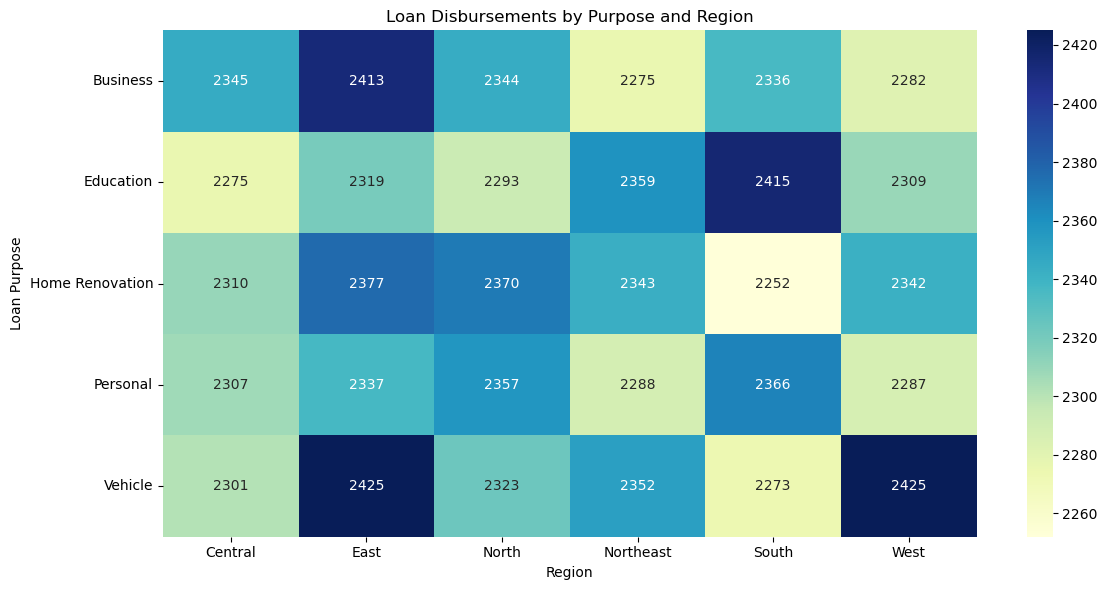

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parse dates in application and loan tables
app1_df['Application_Date'] = pd.to_datetime(app1_df['Application_Date'], errors='coerce')
app1_df['Approval_Date'] = pd.to_datetime(app1_df['Approval_Date'], errors='coerce')
loan1_df['Disbursal_Date'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce')

# Merge loan with customer data to bring in Region
loan_with_region = loan1_df.merge(
    customer1_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Merge applications with enriched loan data
disbursement_efficiency = app1_df.merge(
    loan_with_region[['Loan_ID', 'Customer_ID', 'Disbursal_Date', 'Loan_Status', 'Region']],
    on='Loan_ID',
    how='left'
)

# Calculate processing time from application to disbursal
disbursement_efficiency['Processing_Time'] = (
    disbursement_efficiency['Disbursal_Date'] - disbursement_efficiency['Application_Date']
).dt.days

# --- Avg processing time by loan purpose ---
processing_by_purpose = disbursement_efficiency.groupby('Loan_Purpose').agg({
    'Processing_Time': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={
    'Processing_Time': 'Avg_Processing_Time',
    'Loan_ID': 'Loan_Count'
})

print("📊 Average Processing Time by Loan Purpose:\n", processing_by_purpose.head())

# --- Disbursement trends by loan purpose and region ---
disbursement_by_purpose_region = disbursement_efficiency.groupby(['Region', 'Loan_Purpose']).agg({
    'Loan_ID': 'count'
}).reset_index().rename(columns={'Loan_ID': 'Loan_Count'})

print("\n📍 Disbursement Trends by Region and Purpose:\n", disbursement_by_purpose_region.head())

# --- Heatmap visualization ---
pivot_table = disbursement_by_purpose_region.pivot(
    index='Loan_Purpose',
    columns='Region',
    values='Loan_Count'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Loan Disbursements by Purpose and Region')
plt.xlabel('Region')
plt.ylabel('Loan Purpose')
plt.tight_layout()
plt.show()

# 12. Profitability Analysis

In [132]:
# Calculate the total interest income generated across all loans.
# Calculate total interest income assuming simple interest
loan1_df['Estimated_Interest'] = (
    loan1_df['Loan_Amount'] * 
    loan1_df['Interest_Rate'] * 
    loan1_df['Loan_Term']  # assuming this is in months
) / (12 * 100)

# Total interest income
total_interest_income = loan1_df['Estimated_Interest'].sum()
print(f"💰 Total Estimated Interest Income: ₹{total_interest_income:,.2f}")


💰 Total Estimated Interest Income: ₹75,037,526,934.92


In [134]:
# Identify the most profi table loan purposes based on interest earnings.
# Calculate estimated interest (simple interest assumption)
loan1_df['Estimated_Interest'] = (
    loan1_df['Loan_Amount'] *
    loan1_df['Interest_Rate'] *
    loan1_df['Loan_Term']  # assumed to be in months
) / (12 * 100)

# Merge loan data with application data to bring in Loan_Purpose
loans_with_purpose = loan1_df.merge(
    app1_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

# Group by loan purpose to calculate total interest
interest_by_purpose = loans_with_purpose.groupby('Loan_Purpose')['Estimated_Interest'].sum().reset_index()

# Sort by highest earning purposes
interest_by_purpose_sorted = interest_by_purpose.sort_values(by='Estimated_Interest', ascending=False)

# Display results
print("🔝 Most Profitable Loan Purposes by Interest Earned:\n", interest_by_purpose_sorted.head())


🔝 Most Profitable Loan Purposes by Interest Earned:
       Loan_Purpose  Estimated_Interest
4          Vehicle        1.184490e+10
0         Business        1.174041e+10
1        Education        1.166138e+10
2  Home Renovation        1.162827e+10
3         Personal        1.146694e+10


In [153]:
# The customer1_df only contains Region and not Branch_ID, we can pivot to evaluate profitability by region only:

# Merge loans with region via customer info
loan_with_region = loan1_df.merge(
    customer1_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Estimate interest
loan_with_region['Estimated_Interest'] = (
    loan_with_region['Loan_Amount'] *
    loan_with_region['Interest_Rate'] *
    loan_with_region['Loan_Term']
) / (12 * 100)

# Group by region
region_profitability = loan_with_region.groupby('Region').agg({
    'Estimated_Interest': 'sum',
    'Loan_ID': 'count'
}).reset_index().rename(columns={
    'Estimated_Interest': 'Total_Interest',
    'Loan_ID': 'Loan_Count'
})

print("🌐 Profitability by Region:\n", region_profitability)


🌐 Profitability by Region:
       Region  Total_Interest  Loan_Count
0    Central    1.234785e+10       14849
1       East    1.263948e+10       15316
2      North    1.262674e+10       15041
3  Northeast    1.248872e+10       14944
4      South    1.239625e+10       14949
5       West    1.253849e+10       14901


# 13. Geospatial Analysis

In [159]:
# Map the distribution of active loans across regions.
# Compare default rates across different geographic regions.
# Visualize the loan disbursement trends for rural vs. urban areas.
active_loans = loans_df[loans_df['Loan_Status'] == 'Active'].merge(
    customer1_df[['Customer_ID', 'Region', 'Address']],
    on='Customer_ID',
    how='left'
)

# Map distribution of active loans across regions
active_loans_by_region = active_loans.groupby('Region').agg({
    'Loan_ID': 'count',
    'Loan_Amount': 'sum'
}).reset_index().rename(columns={'Loan_ID': 'Active_Loan_Count', 'Loan_Amount': 'Total_Loan_Amount'})

# Default rates across regions
defaults_with_regions = defaults_df.merge(
    customer1_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

default_rates_by_region = defaults_with_regions.groupby('Region').agg({
    'Default_Amount': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Default_Case_Count'})
default_rates_by_region['Default_Rate'] = (
    defaults_with_regions.groupby('Region')['Default_Amount'].sum()
    / active_loans_by_region.set_index('Region')['Total_Loan_Amount']
).reset_index(drop=True)

# Urban vs. rural loan disbursement trends
loan_disbursement_trends = customer1_df.merge(
    loan1_df[['Customer_ID', 'Loan_Amount', 'Loan_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Region', 'Loan_Status']).agg({
    'Loan_Amount': 'sum'
}).reset_index()

active_loans_by_region.head(), default_rates_by_region.head(), loan_disbursement_trends.head()

(      Region  Active_Loan_Count  Total_Loan_Amount
 0    Central               4936        12373306167
 1       East               5161        13032371023
 2      North               4988        12511535016
 3  Northeast               4996        12528585791
 4      South               4914        12484883476,
       Region  Default_Amount  Default_Case_Count  Default_Rate
 0    Central        60166820                1158      0.004863
 1       East        64656315                1200      0.004961
 2      North        62378265                1169      0.004986
 3  Northeast        59756404                1155      0.004770
 4      South        60965366                1161      0.004883,
     Region Loan_Status   Loan_Amount
 0  Central      Active  1.237331e+10
 1  Central      Closed  1.258501e+10
 2  Central     Overdue  1.228512e+10
 3     East      Active  1.303237e+10
 4     East      Closed  1.262070e+10)

# 14. Default Trends

In [163]:
# Analyze number of defaults over time to identify patterns
default1_df['Default_Date'] = pd.to_datetime(default1_df['Default_Date'], errors='coerce')
default_trends_over_time = default1_df.groupby(default1_df['Default_Date'].dt.to_period('M')).size().reset_index(name='Default_Count')

# Calculate Average default amount for different loan purposes
defaults_with_purpose = default1_df.merge(
    app1_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
)

average_default_by_purpose = defaults_with_purpose.groupby('Loan_Purpose').agg({
    'Default_Amount': 'mean'
}).reset_index().rename(columns={'Default_Amount': 'Average_Default_Amount'})

# Compare default rates across income categories
defaults_with_income = default1_df.merge(
    customer1_df[['Customer_ID', 'Annual_Income']],
    on='Customer_ID',
    how='left'
)

income_bins = [0, 500000, 1000000, 2000000, 5000000, float('inf')]
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
defaults_with_income['Income_Category'] = pd.cut(defaults_with_income['Annual_Income'], bins=income_bins, labels=income_labels)

default_rates_by_income = defaults_with_income.groupby('Income_Category', observed=True).agg({
    'Default_Amount': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Default_Case_Count'})

default_trends_over_time.head(), average_default_by_purpose.head(), default_rates_by_income.head()

(  Default_Date  Default_Count
 0      2021-01            164
 1      2021-02            171
 2      2021-03            189
 3      2021-04            196
 4      2021-05            195,
       Loan_Purpose  Average_Default_Amount
 0         Business            53261.031433
 1        Education            53797.758769
 2  Home Renovation            53038.080028
 3         Personal            52389.399011
 4          Vehicle            52671.599578,
   Income_Category  Default_Amount  Default_Case_Count
 0             Low        59880458                1134
 1    Lower-Middle       104133718                1980
 2          Middle       207921885                3900)

# 15. Branch Efficiency

In [169]:
# Calculate the average loan disbursement time for each branch.
# Identify branches with the highest number of rejected applications.
# Compare branch efficiency based on customer satisfaction metrics (if available).

# Step 1: Calculate disbursement time
app1_df['Disbursement_Time'] = (app1_df['Approval_Date'] - app1_df['Application_Date']).dt.days

# Step 2: Merge application with customer data to get Region
apps_with_region = app1_df.merge(
    customer1_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

# Step 3: Average disbursement time by region
avg_disbursal_by_region = apps_with_region.groupby('Region').agg({
    'Disbursement_Time': 'mean'
}).reset_index().rename(columns={'Disbursement_Time': 'Avg_Disbursement_Time'})

# Step 4: Rejection counts by region
rejected_apps = apps_with_region[apps_with_region['Approval_Status'] == 'Rejected']
rejections_by_region = rejected_apps.groupby('Region').size().reset_index(name='Rejection_Count')

# Step 5: Combine efficiency metrics
region_efficiency = avg_disbursal_by_region.merge(
    rejections_by_region,
    on='Region',
    how='outer'
).fillna({'Avg_Disbursement_Time': 0, 'Rejection_Count': 0})

# Step 6: Merge with branch table to estimate performance per branch
branch_efficiency = branch_df.merge(
    region_efficiency,
    on='Region',
    how='left'
)

# Display result
print("📍 Estimated Branch-Level Efficiency (via Region):\n", branch_efficiency.head())

📍 Estimated Branch-Level Efficiency (via Region):
   Branch_ID             Branch_Name   Region  Total_Customers  \
0      B001    Dhar, Kant and Madan     West             2891   
1      B002              Shan Group     East             4459   
2      B003        Sachdev-Banerjee  Central             2504   
3      B004            Kapadia-Brar     East             1542   
4      B005  Mangal, Kaur and Borde    South              945   

   Total_Active_Loans  Delinquent_Loans  Loan_Disbursement_Amount  \
0                 279                21                 341680882   
1                1201               149                  96549019   
2                 122               168                 445787808   
3                1422                96                 353934299   
4                1613                87                 311637902   

   Avg_Processing_Time  Relationship_Manager_Count  Avg_Disbursement_Time  \
0                    6                          29             669

# 16. Time-Series Analysis

In [175]:
# Analyze monthly loan disbursement trends over the last 5 years.
# Identify seasonal patterns in loan applications and disbursements.
# Compare monthly default rates across regions.

app1_df['Application_Date'] = pd.to_datetime(app1_df['Application_Date'], errors='coerce')
loan1_df['Disbursal_Date'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce')
default1_df['Default_Date'] = pd.to_datetime(default1_df['Default_Date'], errors='coerce')

# Filtering data for the last 5 years
start_date = pd.Timestamp.now() - pd.DateOffset(years=5)
loans_last_5_years = loan1_df[loan1_df['Disbursal_Date'] >= start_date]

# Analyze monthly loan disbursement trends over the last 5 years.
monthly_disbursement_trends = loans_last_5_years.groupby(
    loans_last_5_years['Disbursal_Date'].dt.to_period('M')
).agg({'Loan_ID': 'count', 'Loan_Amount': 'sum'}).reset_index().rename(columns={
    'Loan_ID': 'Loan_Count',
    'Loan_Amount': 'Total_Disbursement'
})

# Identify Seasonal patterns in loan applications and disbursements
applications_last_5_years = app1_df[app1_df['Application_Date'] >= start_date]
seasonal_applications = applications_last_5_years.groupby(
    applications_last_5_years['Application_Date'].dt.month
).size().reset_index(name='Application_Count')

seasonal_disbursements = loans_last_5_years.groupby(
    loans_last_5_years['Disbursal_Date'].dt.month
).size().reset_index(name='Disbursement_Count')

# Compare Monthly default rates across regions
defaults_with_regions = default1_df.merge(
    customer1_df[['Customer_ID', 'Region']],
    on='Customer_ID',
    how='left'
)

monthly_defaults_by_region = defaults_with_regions.groupby([
    defaults_with_regions['Default_Date'].dt.to_period('M'),
    'Region'
]).agg({'Default_ID': 'count'}).reset_index().rename(columns={'Default_ID': 'Default_Count'})


monthly_disbursement_trends.head(), seasonal_applications.head(), seasonal_disbursements.head(), monthly_defaults_by_region.head()

(  Disbursal_Date  Loan_Count  Total_Disbursement
 0        2020-06          39           107403761
 1        2020-07        1502          3766777788
 2        2020-08        1520          3821911676
 3        2020-09        1448          3609549239
 4        2020-10        1501          3786398487,
    Application_Date  Application_Count
 0                 1               1511
 1                 2               1531
 2                 3               1461
 3                 4               1496
 4                 5               1580,
    Disbursal_Date  Disbursement_Count
 0               1                6117
 1               2                5498
 2               3                6044
 3               4                5956
 4               5                6042,
   Default_Date     Region  Default_Count
 0      2021-01    Central             28
 1      2021-01       East             25
 2      2021-01      North             33
 3      2021-01  Northeast             18
 4      2021-

# 17. Customer Behavior Analysis

In [183]:
# Categorize customers based on their repayment behavior (e.g., always on time, occasional defaulters, frequent defaulters).
# Analyze patterns in loan approval and rejection reasons segmented by customer demographics.
# Identify high-value customers with consistent repayment histories.
repayment_behavior = trans1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

# Categorizing repayment behavior
repayment_behavior['Repayment_Category'] = 'Always On Time'
repayment_behavior.loc[
    repayment_behavior['Overdue_Fee'] > 0, 'Repayment_Category'
] = 'Occasional Defaulter'
repayment_behavior.loc[
    repayment_behavior['Default_Amount'].notnull(), 'Repayment_Category'
] = 'Frequent Defaulter'


customer_repayment = repayment_behavior.groupby('Customer_ID')['Repayment_Category'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
).reset_index()


# loan approval and rejection reasons
loan_decision_analysis = app1_df.merge(
    customer1_df[['Customer_ID', 'Gender', 'Age', 'Employment_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Approval_Status', 'Gender', 'Employment_Status']).size().reset_index(name='Count')

# Identify high-value customers with consistent repayment histories.
high_value_customers = repayment_behavior[(repayment_behavior['Repayment_Category'] == 'Always On Time')].groupby(
    'Customer_ID'
).agg({
    'Amount': 'sum'
}).reset_index().rename(columns={'Amount': 'Total_Repayment'}).sort_values(by='Total_Repayment', ascending=False)

customer_repayment.head(), loan_decision_analysis.head(), high_value_customers.head()


(  Customer_ID    Repayment_Category
 0     C000003        Always On Time
 1     C000004  Occasional Defaulter
 2     C000005        Always On Time
 3     C000007        Always On Time
 4     C000008  Occasional Defaulter,
   Approval_Status  Gender Employment_Status  Count
 0        Approved  Female          Salaried   7671
 1        Approved  Female     Self-Employed   7817
 2        Approved  Female        Unemployed   7683
 3        Approved    Male          Salaried   7901
 4        Approved    Male     Self-Employed   7757,
       Customer_ID  Total_Repayment
 1715      C002589           800107
 45025     C067875           707456
 27916     C042245           706124
 37398     C056417           686621
 19521     C029631           660231)

# 18: Risk Assessment

In [185]:
# Develop a risk matrix for loan products based on Default_Amount, Loan_Term, and Interest_Rate.
# Rank loan types by risk level and suggest mitigation strategies.
# Analyze high-risk customer segments by credit score and income.
risk_data = loan1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
).merge(
    customer1_df[['Customer_ID', 'Credit_Score', 'Annual_Income']],
    on='Customer_ID',
    how='left'
)

risk_data['Risk_Level'] = 'Low Risk'
risk_data.loc[
    (risk_data['Default_Amount'] > risk_data['Default_Amount'].mean()) &
    (risk_data['Loan_Term'] > risk_data['Loan_Term'].mean()) &
    (risk_data['Interest_Rate'] > risk_data['Interest_Rate'].mean()),
    'Risk_Level'
] = 'High Risk'

# Ranking loan types by risk level
loan_risk_summary = risk_data.groupby('Loan_Status').agg({
    'Default_Amount': 'sum',
    'Loan_ID': 'count',
    'Risk_Level': lambda x: (x == 'High Risk').sum()
}).reset_index().rename(columns={
    'Default_Amount': 'Total_Default_Amount',
    'Loan_ID': 'Total_Loans',
    'Risk_Level': 'High_Risk_Loans'
})

# Identifying high-risk customer segments by credit score and income
high_risk_customers = risk_data[risk_data['Risk_Level'] == 'High Risk'].groupby(
    ['Credit_Score', 'Annual_Income']
).size().reset_index(name='Customer_Count')

loan_risk_summary.head(), high_risk_customers.head()

(  Loan_Status  Total_Default_Amount  Total_Loans  High_Risk_Loans
 0      Active           158630917.0        30221              325
 1      Closed           158753842.0        30216              317
 2     Overdue           159422998.0        30024              314,
    Credit_Score  Annual_Income  Customer_Count
 0           300         348674               1
 1           301         471110               1
 2           301         939789               1
 3           301        1540700               1
 4           302         457036               1)

# 19. Time to Default Analysis

In [203]:
# Ensure disbursal and default dates are datetime
loan1_df['Disbursal_Date'] = pd.to_datetime(loan1_df['Disbursal_Date'], errors='coerce')
default1_df['Default_Date'] = pd.to_datetime(default1_df['Default_Date'], errors='coerce')

# Merge loan and default data (Customer_ID comes from loan table)
default_merged = loan1_df.merge(
    default1_df[['Loan_ID', 'Default_Date']],
    on='Loan_ID',
    how='inner'
)

# Calculate time to default
default_merged['Time_to_Default'] = (
    default_merged['Default_Date'] - default_merged['Disbursal_Date']
).dt.days

# 1. Average time to default for all overdue loans
avg_time_overdue = default_merged['Time_to_Default'].mean()
print(f"📉 Average Time to Default (Overdue Loans): {avg_time_overdue:.2f} days")

# 2. Loan purposes with shortest time to default
default_by_purpose = default_merged.merge(
    app1_df[['Loan_ID', 'Loan_Purpose']],
    on='Loan_ID',
    how='left'
).groupby('Loan_Purpose').agg({
    'Time_to_Default': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={
    'Loan_ID': 'Loan_Count',
    'Time_to_Default': 'Avg_Time_to_Default'
}).sort_values(by='Avg_Time_to_Default')

print("\n🏦 Avg Time to Default by Loan Purpose:\n", default_by_purpose.head())

# 3. Time to default by demographics
default_by_demo = default_merged.merge(
    customer1_df[['Customer_ID', 'Gender', 'Age', 'Employment_Status']],
    on='Customer_ID',
    how='left'
).groupby(['Gender', 'Employment_Status']).agg({
    'Time_to_Default': 'mean',
    'Loan_ID': 'count'
}).reset_index().rename(columns={
    'Loan_ID': 'Loan_Count',
    'Time_to_Default': 'Avg_Time_to_Default'
})

print("\n👥 Avg Time to Default by Gender and Employment:\n", default_by_demo.head())


📉 Average Time to Default (Overdue Loans): 206.67 days

🏦 Avg Time to Default by Loan Purpose:
       Loan_Purpose  Avg_Time_to_Default  Loan_Count
1        Education           185.538296        1397
0         Business           196.201754        1368
2  Home Renovation           197.039660        1412
4          Vehicle           227.274455        1421
3         Personal           230.888418        1416

👥 Avg Time to Default by Gender and Employment:
    Gender Employment_Status  Avg_Time_to_Default  Loan_Count
0  Female          Salaried           193.753012         996
1  Female     Self-Employed           210.568898        1016
2  Female        Unemployed           181.468660        1037
3    Male          Salaried           229.555771        1031
4    Male     Self-Employed           136.653191         940


# 20. Transaction Pattern Analysis

In [211]:
# Identify customers with irregular repayment patterns
transaction_patterns = trans1_df.merge(
    default1_df[['Loan_ID', 'Default_Amount']],
    on='Loan_ID',
    how='left'
)

# Tag repayment behavior
transaction_patterns['Repayment_Pattern'] = 'Regular'
transaction_patterns.loc[transaction_patterns['Overdue_Fee'] > 0, 'Repayment_Pattern'] = 'Irregular'
transaction_patterns.loc[transaction_patterns['Default_Amount'].notnull(), 'Repayment_Pattern'] = 'Defaulted'

# Most frequent behavior per customer
irregular_customers = transaction_patterns.groupby('Customer_ID')['Repayment_Pattern'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
).reset_index().rename(columns={'Repayment_Pattern': 'Dominant_Repayment_Pattern'})

# Analyze penalty payments as a proportion of total transactions
# Ensure no divide-by-zero
penalty_proportion = transaction_patterns.groupby('Customer_ID').agg({
    'Overdue_Fee': 'sum',
    'Amount': 'sum'
}).reset_index()

penalty_proportion['Penalty_Proportion'] = penalty_proportion.apply(
    lambda row: row['Overdue_Fee'] / row['Amount'] if row['Amount'] > 0 else 0,
    axis=1
)

# Compare transaction amounts for overdue vs. non-overdue loans
transaction_comparison = transaction_patterns.groupby('Repayment_Pattern').agg({
    'Amount': ['mean', 'sum'],
    'Overdue_Fee': 'mean'
}).reset_index()

# Rename columns for clarity
transaction_comparison.columns = ['Repayment_Pattern', 'Avg_Transaction_Amount', 'Total_Transaction_Amount', 'Avg_Overdue_Fee']

print("📌 Irregular Customers:\n", irregular_customers.head())
print("\n📊 Penalty Proportion per Customer:\n", penalty_proportion.head())
print("\n📈 Transaction Comparison by Repayment Pattern:\n", transaction_comparison)


📌 Irregular Customers:
   Customer_ID Dominant_Repayment_Pattern
0     C000003                    Regular
1     C000004                  Irregular
2     C000005                    Regular
3     C000007                  Irregular
4     C000008                  Irregular

📊 Penalty Proportion per Customer:
   Customer_ID  Overdue_Fee  Amount  Penalty_Proportion
0     C000003         5727  236989            0.024166
1     C000004        18447  357739            0.051566
2     C000005            0   52085            0.000000
3     C000007         5961  179269            0.033252
4     C000008         6279   62713            0.100123

📈 Transaction Comparison by Repayment Pattern:
   Repayment_Pattern  Avg_Transaction_Amount  Total_Transaction_Amount  \
0         Defaulted            25324.641083                1251214542   
1         Irregular            25507.576090                5713467476   
2           Regular            25514.925449                5719272599   

   Avg_Overdue_Fee  
